# Part II: Tidying the Data

Competition data has been collected from the API and written into CSV files. There may be missing data that needs to be dealt with, and there may be data that needs to be changed into a format that is usable for analysis with Pandas.

In [1]:
# import needed packages

import pandas as pd
import numpy as np
import scikit_posthocs as sp
import json
import csv

In [2]:
# open csv files containing the competition data and convert into data frames

comp_df1 = pd.read_csv('competitionstats.csv')
comp_df2 = pd.read_csv('competitionstats2.csv')
comp_df3 = pd.read_csv('competitionstats3.csv')
comp_df4 = pd.read_csv('competitionstats4.csv')
comp_df5 = pd.read_csv('competitionstats5.csv')

In [3]:
# combine all data frames
comp_df = pd.concat([comp_df1, comp_df2, comp_df3, comp_df4, comp_df5])

### Adding Competition Dates to the Data Frame:

In [7]:
import requests

url = "https://services.worlddancesport.org/api/1/competition"
params = {'format':'json'}
    
# request to competition information page
r = requests.get(url, params=params, auth=('natalie314', '1O13!o13'))

In [8]:
js = r.json()

In [9]:
# view example
js[0]

{'link': [{'href': 'https://services.worlddancesport.org/api/1/competition/35093',
   'rel': 'self'},
  {'href': 'https://services.worlddancesport.org/api/1/participant?competitionId=35093',
   'rel': 'http://services.worlddancesport.org/rel/competition/participants',
   'type': 'application/vnd.worlddancesport.participants+json'},
  {'href': 'https://services.worlddancesport.org/api/1/official?competitionId=35093',
   'rel': 'http://services.worlddancesport.org/rel/competition/officials',
   'type': 'application/vnd.worlddancesport.officials+json'}],
 'id': 35093,
 'name': 'INTERNATIONAL OPEN STANDARD  ADULT - Finland - Finland - 1996/01/04',
 'lastmodifiedDate': '2010-11-13T10:16:26'}

The date of the competition is under 'name'.

In [10]:
# convert json data into pandas data frame
dates_df = pd.DataFrame(js)

names = dates_df['name']

# extract the date from the "name" column of the data frame
# the date is the last 10 characters of the string
dates_df['date'] = dates_df['name'].str[-10:]

dates_df = dates_df[['id','date']]

# add the "date" column to our main competition data frame, using the competition IDs corresponding to the dates
comp_df = pd.merge(comp_df, dates_df, left_on = 'competitionId', right_on = 'id', how = 'left')

In [15]:
# view example
comp_df.head(2)

,coupleId,name,country,id_x,status,basepoints,rank,competitionId,rounds,id_y,date
0,wdsf-453999,Vesa Anttila - Tuula Raukovaara,Finland,885401,Present,0,1,35093,[],35093,1996/01/04
1,wdsf-449387,"Peep Vardja - Vardja, Ave",Finland,885400,Present,0,2,35093,[],35093,1996/01/04


In [19]:
# delete the duplicate competition ID column
comp_df = comp_df.drop('id_y', 1)

# remove all participants that were not present
comp_df = comp_df[comp_df['status'] == "Present"]

# delete the "status" column
comp_df = comp_df.drop('status', 1)

### Adding Dance Genres to the Data Frame

The entries in the "rounds" column are formatted as strings. The dance genres of the corresponding competition are found within those strings. 

In [21]:
# create a list of dance styles, to be used to extract the dance styles for each participant
dances = ["QUICKSTEP", "TANGO", "FOXTROT", "SALSA", "SAMBA", "RUMBA", "VIENNESE WALTZ", "WALTZ", "SLOW FOXTROT", "BOLERO", 
          "CHA CHA CHA", "BACHATA", "MAMBO", "PASO DOBLE", "JIVE", "EAST COAST SWING", "MERENGUE", "SHOWDANCE", "BREAKING",
          "BOOGIE", "HIP HOP", "MODERN", "JAZZ", "DISCO", "LINDY", "BALBOA", "CHARLESTON", "SHAG", "JITTERBUG", "LOCKING", 
          "POPPING", "ELECTRIC BOOGALOO", "CHA CHA"]

#find the dance styles in the "rounds" column, then extract a list of dance styles into a new column
comp_df['dances'] = comp_df['rounds'].str.findall('|'.join(dances))

In [22]:
# view example
comp_df.loc[540709:540716]

,coupleId,name,country,id_x,basepoints,rank,competitionId,rounds,date,dances
540709,rls-21430,Ravai Mauro - Concetta Carbone,Italy,1870232,68,18,50954,"[{'name': '1', 'maxDeviation': None, 'dances':...",2017/11/24,"[QUICKSTEP, SLOW FOXTROT, TANGO, VIENNESE WALT..."
540710,rls-50105,Silvano Saccon - Nadia Petejan,Italy,1870217,66,19,50954,"[{'name': '1', 'maxDeviation': None, 'dances':...",2017/11/24,"[QUICKSTEP, SLOW FOXTROT, TANGO, VIENNESE WALT..."
540711,rls-28900,Elio Ferraioli - Pia Avallone,Italy,1870204,64,20,50954,"[{'name': '1', 'maxDeviation': None, 'dances':...",2017/11/24,"[QUICKSTEP, SLOW FOXTROT, TANGO, VIENNESE WALT..."
540712,rls-53929,Alfredo Faelli - Mariagrazia Rosagni,Italy,1870208,62,21,50954,"[{'name': '1', 'maxDeviation': None, 'dances':...",2017/11/24,"[QUICKSTEP, SLOW FOXTROT, TANGO, VIENNESE WALT..."
540713,rls-21032,Jean-louis Morel - Monique Deghaye,Belgium,1870212,60,22,50954,"[{'name': '1', 'maxDeviation': None, 'dances':...",2017/11/24,"[QUICKSTEP, SLOW FOXTROT, TANGO, VIENNESE WALT..."
540714,rls-28816,Giordano Ermini - Nicoletta Gori,Italy,1870209,58,23,50954,"[{'name': '1', 'maxDeviation': None, 'dances':...",2017/11/24,"[QUICKSTEP, SLOW FOXTROT, TANGO, VIENNESE WALT..."
540715,rls-60290,Michele De Bartolo - Gloria Gessaga,Italy,1870211,55,24,50954,"[{'name': '1', 'maxDeviation': None, 'dances':...",2017/11/24,"[QUICKSTEP, SLOW FOXTROT, TANGO, VIENNESE WALT..."
540716,rls-21361,Livio Bagiolo - Maria Mara Zaza,Italy,1870231,55,24,50954,"[{'name': '1', 'maxDeviation': None, 'dances':...",2017/11/24,"[QUICKSTEP, SLOW FOXTROT, TANGO, VIENNESE WALT..."


It may be easier to use the dance genres for analysis later if the entries in the "dances" column are not lists. This column can be separated so that there is only one string for each entry in multiple dance genre columns.

In [25]:
# delete the repeated elements of the lists in the "dances" column
comp_df['dances'] = comp_df['dances'].apply(lambda x: list(set(x)))

# create one column for each element under the lists in "dances"
dances_cols = comp_df['dances'].apply(pd.Series, dtype='object')

# add the individual dance style columns to our main competition dataframe 
comp_df = pd.concat([comp_df, dances_cols], axis=1)

In [26]:
# view example
comp_df = comp_df.drop('dances', 1)
comp_df.loc[540709:540711]

C:\Users\Natalie\AppData\Local\Temp\ipykernel_30332\1292938377.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  comp_df = comp_df.drop('dances', 1)


,coupleId,name,country,id_x,basepoints,rank,competitionId,rounds,date,0,1,2,3,4,5,6,7,8,9
540709,rls-21430,Ravai Mauro - Concetta Carbone,Italy,1870232,68,18,50954,"[{'name': '1', 'maxDeviation': None, 'dances':...",2017/11/24,QUICKSTEP,SLOW FOXTROT,WALTZ,VIENNESE WALTZ,TANGO,NaN,NaN,NaN,NaN,NaN
540710,rls-50105,Silvano Saccon - Nadia Petejan,Italy,1870217,66,19,50954,"[{'name': '1', 'maxDeviation': None, 'dances':...",2017/11/24,QUICKSTEP,SLOW FOXTROT,WALTZ,VIENNESE WALTZ,TANGO,NaN,NaN,NaN,NaN,NaN
540711,rls-28900,Elio Ferraioli - Pia Avallone,Italy,1870204,64,20,50954,"[{'name': '1', 'maxDeviation': None, 'dances':...",2017/11/24,QUICKSTEP,SLOW FOXTROT,WALTZ,VIENNESE WALTZ,TANGO,NaN,NaN,NaN,NaN,NaN


In [28]:
# rename dance style columns
comp_df = comp_df.rename(columns={0: 'dance1', 1: 'dance2', 2: 'dance3', 3: 'dance4', 4: 'dance5', 5: 'dance6', 6: 'dance7',
                        7: 'dance8', 8: 'dance9', 9: 'dance10',})

Because each competition has a different number of participants, the average rank for a couple is not meaningful (being in 3rd place in a competition with 5 participants is different than being in 3rd place in a competition with 50 participants). I will divide each participant's rank by the number of total participants in the competition to get a new rank that can be used later when analyzing data.

In [29]:
# create a participant count data frame
comp_counts = comp_df['competitionId'].value_counts()
comp_counts = pd.DataFrame(comp_counts).reset_index()
comp_counts = comp_counts.rename(columns={'index':'competitionId', 'competitionId':'partic_count'})

#view example
comp_counts.head(1)

,competitionId,partic_count
0,39570,448


In [31]:
# drop all competitions with only one participant
comp_counts = comp_counts[comp_counts['partic_count'] > 1]

# add participant counts to our main competition data frame
comp_df = pd.merge(comp_df, comp_counts, left_on = 'competitionId', right_on = 'competitionId', how = 'left')
comp_df.head(1)

,coupleId,name,country,id_x,basepoints,rank,competitionId,rounds,date,dance1,dance2,dance3,dance4,dance5,dance6,dance7,dance8,dance9,dance10,partic_count
0,wdsf-453999,Vesa Anttila - Tuula Raukovaara,Finland,885401,0,1,35093,[],1996/01/04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0


In [32]:
# get new rank score
comp_df['nrank'] = comp_df['rank'] / comp_df['partic_count']

# drop all rows where the rank is 0 and less than 1
comp_df = comp_df[comp_df['nrank'] > 0]
comp_df = comp_df[comp_df['nrank'] <= 1]

I will solely be analyzing the partner dance competitions for now, so I will create a separate data frame for the partner dance competitions. 

In [478]:
cplcomp_df = comp_df[comp_df['coupleId'].notna()]

# delete "rounds" column
cplcomp_df = cplcomp_df.drop('rounds', 1)

# Part 3: Exploratory Data Analysis

The purpose of this section is to get a basic understanding the dataset's properties.

In [34]:
# replace null values in the dance style columns with the string "NONE"
cplcomp_df = cplcomp_df.fillna('NONE')

# count occurences of the dances styles for each of the "dance" columns, and then get the sum of these occurances across all
#  "dance" columns
cplcomp_df.iloc[:, 8:17].apply(pd.value_counts).sum(axis=1)

BOLERO                  4.0
CHA CHA CHA        147966.0
FOXTROT                96.0
JIVE               147964.0
MAMBO                   4.0
NONE              4043109.0
PASO DOBLE         147665.0
QUICKSTEP          167306.0
RUMBA              147873.0
SALSA                  27.0
SAMBA              147943.0
SHOWDANCE             520.0
SLOW FOXTROT       173444.0
TANGO              173817.0
VIENNESE WALTZ     173704.0
WALTZ              173817.0
dtype: float64

Tango and Waltz are the most common genres of dance, and Mambo and Salsa are the least common.

In [601]:
# get number of occurences for each country
country_count = cplcomp_df['country'].value_counts()
country_count

Russian Federation    139484
Italy                  91440
Germany                58150
Czech Republic         26256
Ukraine                20109
                       ...  
Dominican Republic         1
Zimbabwe                   1
Monaco                     1
Senegal                    1
Sri Lanka                  1
Name: country, Length: 98, dtype: int64

Participants from Russia and Italy have competed in significantly more competitions than participants from any other countries.

[]

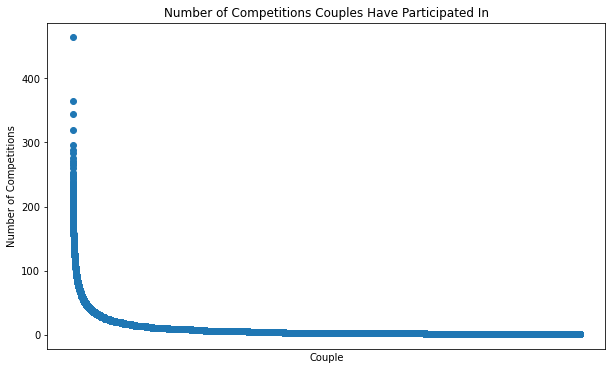

In [608]:
# see how many competitions couples have competed in

cpl_count = cplcomp_df['coupleId'].value_counts()

ax = cpl_count.plot(style = "o", figsize = (10,6))
ax.set(title = "Number of Competitions Couples Have Participated In", xlabel = "Couple", ylabel = "Number of Competitions")
ax.set_xticks([])

The vast majority of couples have competed in less than 50 competitions. The couples that have competed in more than 300 competitions are outliers. 

### Competition Trends Over Time

Listed on their website, part of the World DanceSport Federation's vision is to become more global and appeal to a broad demographic. Using the competition dataset, we can see how many countries have been competing in World DanceSport competitions every year. 

In [270]:
# convert dates to datetime format
cplcomp_df['date'] = pd.to_datetime(cplcomp_df['date'])

In [446]:
# create a data frame for the number of countries that appear each year

cplcomp_df['year'] = pd.DatetimeIndex(cplcomp_df['date']).year
country_year = cplcomp_df[cplcomp_df['country'] != 'NONE']
country_year = country_year.groupby(['year', 'country']).country.count()

country_year = pd.DataFrame(country_year)

In [450]:
country_nums = []

# count the number of total countries for each year
for i in range(1996,2022):
    country_num = len(country_year.loc[(i,)])
    country_nums.append(country_num)

In [493]:
# create a data frame for the number of competitions each year

comps_year = cplcomp_df[['competitionId','year']].groupby('year').count()
comps_year = pd.DataFrame(comps_year)

In [519]:
comps_nums = []

# count the number of total competitions for each year
for i in range(1996,2022):
    comps_num = comps_year.loc[(i,)]
    comps_nums.append(comps_num)

In [586]:
nums = [*range(0,50000)]
years = [*range(1996, 2022)]

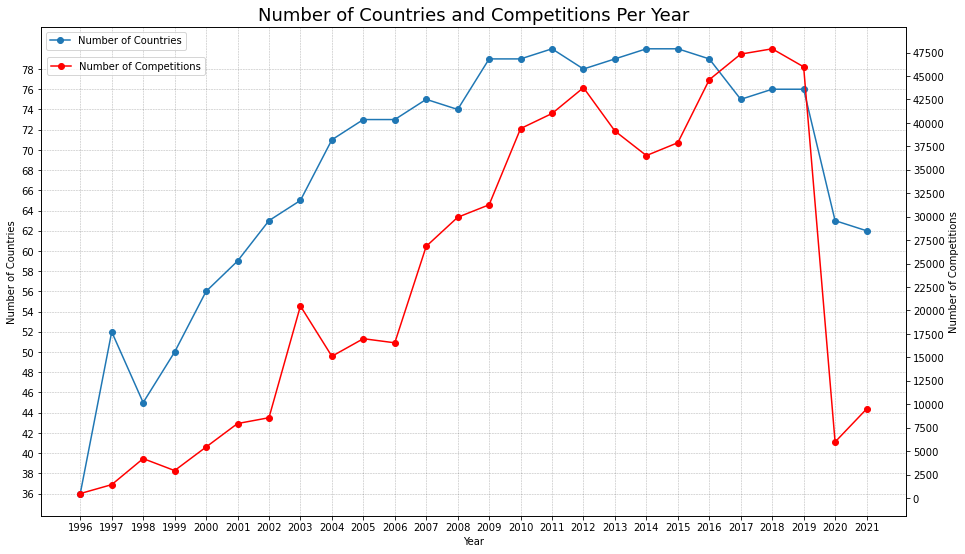

In [599]:
# create plot for the number of countries and competitions for each year

fig,ax = plt.subplots()
ax.plot(years, country_nums, marker = 'o', label = 'Number of Countries')
plt.legend(loc = 'upper left')
ax.set(ylabel = 'Number of Countries', xlabel = 'Year')
ax.set_title('Number of Countries and Competitions Per Year', fontsize = 18)
ax.set_xticks(years)
ax.set_yticks(np.arange(min(country_nums), max(country_nums), 2.0))
ax.grid(True, 'major', 'x', ls = '--', lw = .5, c = 'k', alpha = .3)
ax.grid(True, 'major', 'y', ls = '--', lw = .5, c = 'k', alpha = .3)
fig.set_size_inches(15.5, 9)
ax2 = ax.twinx()
ax2.plot(years, comps_nums, color = 'red', marker = 'o', label = 'Number of Competitions')
ax2.set(ylabel = 'Number of Competitions')
ax2.set_yticks(np.arange(min(nums), max(nums), 2500.0))
plt.legend(loc = (0.007,0.9))
plt.show()

Both the number of countries competing and the number of competitions have trended upwards from 1996 to 2012. The steepest drop is between 2019 to 2020, when COVID-19 began spreading. The drop in the number of competitions was steeper than the drop in the number of countries. There was not an increase in the number of countries competing in 2021, even though the number of competitions increased from 5,000 to 10,000. The World DanceSport Federation's goal of becoming more global peaked in 2011. However even after a large decrease in the number of competitions taking place, there were still over 60 countries being represented in 2020 and 2021.

# Part III: Finding Factors Related to Competition Performance

### How Much Does Frequency of Competing Matter?

Do couples that have competed in more competitions tend to have a better average score? Note that a lower "nrank" value indicates a better ranking.

In [37]:
# make a couple count data frame and add the average rank of the couple
cpl_count_df = pd.DataFrame(cpl_count).reset_index()

cpl_count_df = cpl_count_df.rename(columns={'index':'coupleId', 'coupleId':'competitions'})
cpl_count_df.head(1)

,coupleId,competitions
0,rls-1780,464


In [38]:
# create a data frame for couple rankings for each competition
rank_df = cplcomp_df[['coupleId', 'nrank']]
rank_df.head(1)

,coupleId,nrank
0,wdsf-453999,0.041667


In [39]:
# get the average of a couple's ranking for all competitions for each couple

rank_df = rank_df.groupby('coupleId')
mean_rank = rank_df.mean().reset_index()
mean_rank.head(1)

,coupleId,nrank
0,rls-1,0.264802


In [40]:
# create data frame with number of competitions and nrank

cpl_count_df = pd.merge(cpl_count_df, mean_rank, left_on = 'coupleId', right_on = 'coupleId', how = 'left')
cpl_count_df.head(1)

,coupleId,competitions,nrank
0,rls-1780,464,0.332178


In [41]:
# make data frame for couples that have competed in more than 25 competitions
cpl_count_df = cpl_count_df[cpl_count_df['competitions'] > 25]

In [42]:
# find correlation between number of competitions the couple participated in and the rank of the couple
print(cpl_count_df['competitions'].corr(cpl_count_df['nrank']))

-0.24566112029721102


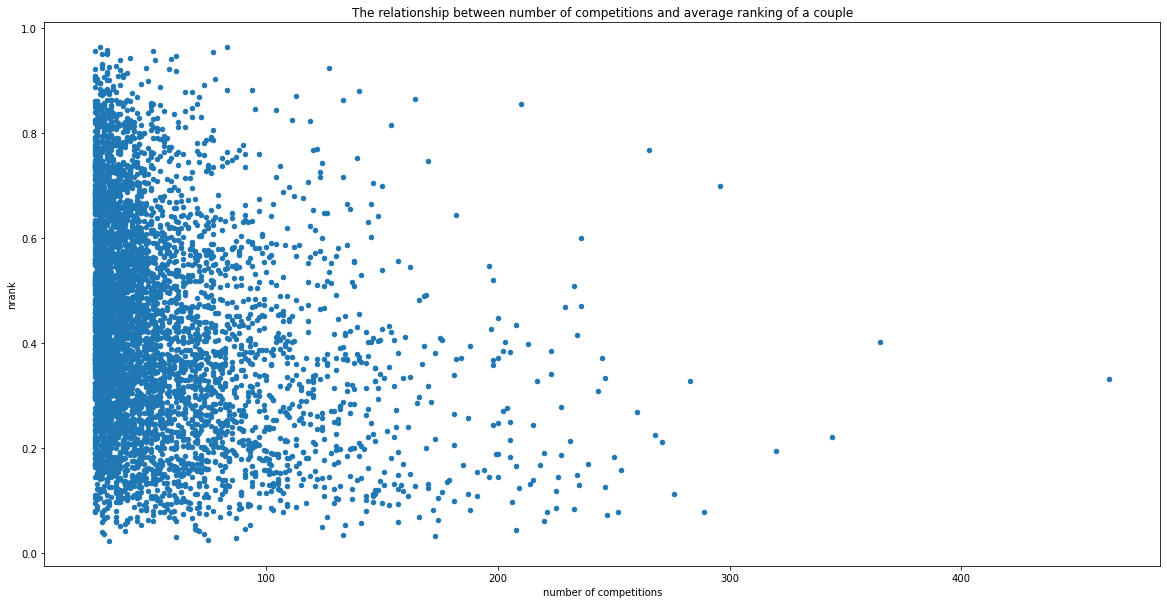

In [43]:
# create scatterplot
import matplotlib.pyplot as plt

cpl_count_df.plot('competitions', 'nrank', kind='scatter', figsize = (20,10))
plt.xlabel('number of competitions')
plt.ylabel('nrank')
plt.title("The relationship between number of competitions and average ranking of a couple")
plt.show()

There does not appear to be a strong relationship between the number of times a couple has competed and that couple's average overall ranking. Though once the number of competitions reaches 100, there are more points on the bottom half than on the top half. This shows that the couples that have competed in 100 or more competitions tend to have an "nrank" value lower than the average nrank of 0.4. Note that a lower nrank is a better score.

I will now separate the couples into groups according to the number of competitions they have participated in, and then compare the medians between these groups:

In [102]:
# drop outliers
cpl_count_df = cpl_count_df[cpl_count_df['competitions'] <= 300]

# create bins for number of competitions per couple
bin1 = cpl_count_df[cpl_count_df['competitions'] <= 50]
bin2 = cpl_count_df[(cpl_count_df['competitions'] > 50) & (cpl_count_df['competitions'] <= 100)]
bin3 = cpl_count_df[(cpl_count_df['competitions'] > 100) & (cpl_count_df['competitions'] <= 150)]
bin4 = cpl_count_df[(cpl_count_df['competitions'] > 150) & (cpl_count_df['competitions'] <= 200)]
bin5 = cpl_count_df[(cpl_count_df['competitions'] > 200) & (cpl_count_df['competitions'] <= 250)]
bin6 = cpl_count_df[(cpl_count_df['competitions'] > 250) & (cpl_count_df['competitions'] <= 300)]

In [46]:
# find the medians of the ranks for each bin

med1 = bin1['nrank'].median()
med2 = bin2['nrank'].median()
med3 = bin3['nrank'].median()
med4 = bin4['nrank'].median()
med5 = bin5['nrank'].median()
med6 = bin6['nrank'].median()

print(med1, med2, med3, med4, med5, med6)

0.4589214646171973 0.3651370476918469 0.3155489875062879 0.24237445760548187 0.2150850378170312 0.21901178623495582


The median ranks do decrease as the number of competitions increase, except for the last two groups with more than 200 competitions. 

The Kruskal Wallis test can be used to determine if the differences between these medians are statistically significant. It is also appropriate to use the Kruskal Wallis test for this data set because the test does not require that the data be normally distributed. 

In [47]:
from scipy import stats

# kruskal wallis test
stats.kruskal(bin1['nrank'], bin2['nrank'], bin3['nrank'], bin4['nrank'], bin5['nrank'], bin6['nrank'])

KruskalResult(statistic=347.07579378373157, pvalue=7.458521103259943e-73)

Because of the small p-value, the null hypothesis (that the medians are all equal) is rejected. This indicates that there is at least one difference between the medians somewhere, though the test does not indicate between which groups the differences exist. The posthoc Dunn test can be used to indicate where there are differences between the medians. The Dunn test also does not require that the data be normally distributed. 

In [114]:
# make a dataframe that can be used for the posthoc_dunn function from the scikit_posthoc package

bin1['group'] = '<50'
bin2['group'] = '50-99'
bin3['group'] = '100-149'
bin4['group'] = '150-199'
bin5['group'] = '200-249'
bin6['group'] = '250-299'

bin_df = pd.concat([bin1, bin2, bin3, bin4, bin5, bin6])

In [117]:
sp.posthoc_dunn(bin_df, val_col='nrank', group_col='group')

,100-149,150-199,200-249,250-299,50-99,<50
100-149,1.000000e+00,6.946469e-03,8.237328e-03,0.379584,8.105693e-05,6.988964e-30
150-199,6.946469e-03,1.000000e+00,6.113644e-01,0.904144,3.895300e-07,5.692969e-19
200-249,8.237328e-03,6.113644e-01,1.000000e+00,0.703836,1.442034e-05,1.284796e-12
250-299,3.795842e-01,9.041439e-01,7.038359e-01,1.000000,1.032373e-01,3.642686e-03
50-99,8.105693e-05,3.895300e-07,1.442034e-05,0.103237,1.000000e+00,2.160936e-37
<50,6.988964e-30,5.692969e-19,1.284796e-12,0.003643,2.160936e-37,1.000000e+00


The p-values indicate that the medians are significant between most groups. However, we can not conclude that the median ranking is different for the group that competed in 250-299 competitions. This suggests that as the number of competitions that a couple has competed in increases, their median score does improve until the number of competitions reaches 200. After 200 competitions, there does not appear to be a difference in a couple's overall score.

### Genres

Do couples that dance a wider variety of genres perform better or worse in competitions? 

In [197]:
dance_counts = cplcomp_df.groupby('coupleId')

# get a list of couple IDs
cplId_list = cpl_count_df['coupleId'].tolist()

In [203]:
listlength = len(cplId_list)
# initialize a list for the number of dance genres for a couple
dancenums = []

# iterate through each couple ID, and count how many genres of dance that couple has danced throughout all of their 
#  competitions
for i in range(listlength):
    cplId = cplId_list[i]
    couple = dance_counts.get_group(cplId)
    dances = couple.iloc[:, 8:18].apply(pd.value_counts).sum(axis=1)
    dancenum = len(dances)
    dancenums.append(dancenum)
    
# add a couple's "genre count" to a dataframe
cpl_count_df['genre_count'] = dancenums

In [613]:
cpl_count_df['genre_count'].unique()

array([11,  6,  7, 12,  2], dtype=int64)

Under the "genre_count" column, there are 5 different unique values: 2, 6, 7, 11, and 12. Because "NONE" has been counted in genre_count, 1 can be subtracted from each of these values. The couples can be separated into two groups: those who have danced 5-6 genres and those who have danced 10-11 genres. There are not any couples here that have danced 7-9 different genres.

In [216]:
# drop if a couple's genre count is 1
cpl_count_df = cpl_count_df[cpl_count_df['genre_count'] > 1]

In [221]:
# create a data frame for the couples that have danced 7 or less genres and another data frame for the couples that have 
# danced more than 7 genres
group1 = cpl_count_df[cpl_count_df['genre_count'] < 8]
group2 = cpl_count_df[cpl_count_df['genre_count'] > 7]

med1 = group1['nrank'].median()
med2 = group2['nrank'].median()
mean1 = group1['nrank'].mean()
mean2 = group2['nrank'].mean()

print('group 1 mean:', mean1, 'group 1 median:', med1, 'group 2 mean:', mean2, 'group 2 median:', med2, sep='\n')

group 1 mean:
0.4151328690335027
group 1 median:
0.38716562316451875
group 2 mean:
0.4844879356132811
group 2 median:
0.4732716833203933


The means and medians for the couples that have danced 5-6 genres are lower than the means and medians for the couples that have dances 10-11 genres. Because a lower "nrank" is a better score, this means that the couples that have danced fewer genres have better mean and median scores.

In [242]:
# couples that have danced 5-6 genres
group1.describe()

,competitions,nrank,genre_count
count,2262.000000,2262.000000,2262.000000
mean,57.974359,0.415133,6.041998
std,38.209290,0.203387,0.221580
min,26.000000,0.023499,2.000000
25%,32.000000,0.254157,6.000000
50%,44.000000,0.387166,6.000000
75%,70.000000,0.560494,6.000000
max,289.000000,0.954745,7.000000


In [243]:
# couples that have danced 10-11 genres
group2.describe()

,competitions,nrank,genre_count
count,1617.000000,1617.000000,1617.000000
mean,57.581323,0.484488,11.027829
std,38.315696,0.196993,0.164534
min,26.000000,0.042866,11.000000
25%,33.000000,0.332094,11.000000
50%,44.000000,0.473272,11.000000
75%,67.000000,0.633013,11.000000
max,296.000000,0.963203,12.000000


The two groups have the same mean number of competitions, and have similar standard deviations.

The Mann-Whitney test is appropriate for comparing two groups that aren't normally distributed and have different sample sizes. 

In [229]:
import scipy.stats as stats

# perform Mann Whitney test to compare the two groups
stats.mannwhitneyu(group1['nrank'], group2['nrank'], alternative = 'two-sided')

MannwhitneyuResult(statistic=1461583.0, pvalue=1.2774124596383472e-26)

Because the p-value is small, we can reject the null hypothesis that the ranking for the two groups are the same. This suggests that the average rank for couples that have danced less genres is lower (a lower rank is a better score). This may be because couples that focus on a few styles are able to better master those genres and perform better in competitions, as opposed to couples that try many different styles. 

# Conclusion

From looking at the number of countries being represented in competitions every year, we can see that the World DanceSport Federation has been achieving their goal of becoming more international, although the number of countries being represented peaked in 2011, and dropped significantly during the start of the COVID-19 pandemic.

In regards to competition performance, couples that have competed in more competitions do have better performance scores up to a certain point; after 200 competitions, couples' scores do not improve. It has also been found that couples that focus on dancing 5-6 different styles have slightly better scores than couples that dance 10-11 different styles. 